#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [ ]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pytz
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates


**Required Functions**

In [ ]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [ ]:
#The funcion will check the geo location and convert the time to corrresponding time in the geographic location
def getLocalDateTime(df) :    
    time_zone = df['time_zone']
    utc_timestamp=df['utc_timestamp']    
    if (time_zone == 'Europe/Dublin') :
        return utc_timestamp.tz_convert('Europe/Dublin')
    elif (time_zone == 'Asia/Riyadh') :
        return utc_timestamp.tz_convert('Asia/Riyadh')
    elif (time_zone == 'Asia/Dubai') :
        return utc_timestamp.tz_convert('Asia/Dubai')    
    elif (time_zone == 'Asia/Kolkata') :
        return utc_timestamp.tz_convert('Asia/Kolkata')

In [ ]:
#function to assign number to different time slot
def getTimeSlotNo(event_time):
  if event_time == 'Morning':
    return 1
  elif event_time == 'Noon':
    return 2
  elif event_time =='After Noon':
    return 3
  elif event_time =='Evening':
    return 4
  elif event_time =='Dinner':
    return 5
  elif event_time =='Night':
    return 6

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 Dailywise_DwellTime_FlightTime.jpeg
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Month_DwellTime_FlightTime.jpeg
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIME
 Timeslot_DwellTime_FlightTime.jpeg
 WeekDays_DwellTime_FlightTime.jpeg


**Read Pickle**

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_new_multiple_user_26_07_2021.p')
df_event

Start Pickle Load time: 2021-08-09 12:02:50.404925
End Pickle Load time: 2021-08-09 12:02:57.197551   Duration:0:00:06.792626


,index,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month
0,0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2
1,1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2
2,2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2
3,3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2
4,4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308195,311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening,7
308196,311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening,7
308197,311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening,7
308198,311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening,7


**Visualisation**

In [ ]:
#remove less active user #activedays=1
df_event=df_event[~df_event.user_name.isin(['user4','user6','user10'])]


Mulitple Users -Different Time Slot

In [ ]:
#add extra column as timeslot no for plotting x-axis in slot order
# using the 'getLocalDateTime' function we will convert the time to the time at its respective time zones & stored in 'geo_localTime'  
df_event['time_slot_no'] = df_event.time_slot.apply(lambda x:getTimeSlotNo(x))
df_event

,index,user_name,time_zone,country_code,event_start_time,event_end_time,dwell_time,dwell_time_ms,flight_time,flight_time_ms,event_date,event_day,event_hour,time_slot,event_month,time_slot_no
0,0,user2,Europe/Dublin,IE,2021-02-02 10:58:02.243,2021-02-02 10:58:02.301000,0 days 00:00:00.058000,58.0,0 days 00:00:00.783000,783.0,02-02-2021,2,10,Morning,2,1
1,1,user2,Europe/Dublin,IE,2021-02-02 10:58:03.233,2021-02-02 10:58:03.258000,0 days 00:00:00.025000,25.0,0 days 00:00:00.932000,932.0,02-02-2021,2,10,Morning,2,1
2,2,user2,Europe/Dublin,IE,2021-02-02 10:58:03.597,2021-02-02 10:58:03.624000,0 days 00:00:00.027000,27.0,0 days 00:00:00.339000,339.0,02-02-2021,2,10,Morning,2,1
3,3,user2,Europe/Dublin,IE,2021-02-02 10:58:15.383,2021-02-02 10:58:15.463000,0 days 00:00:00.080000,80.0,0 days 00:00:00.298000,298.0,02-02-2021,2,10,Morning,2,1
4,4,user2,Europe/Dublin,IE,2021-02-02 11:03:44.703,2021-02-02 11:03:44.780000,0 days 00:00:00.077000,77.0,0 days 00:00:00.561000,561.0,02-02-2021,2,11,Morning,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308195,311902,user15,Asia/Kolkata,IN,2021-07-26 22:51:44.538,2021-07-26 22:51:44.619000,0 days 00:00:00.081000,81.0,0 days 00:00:00.273000,273.0,26-07-2021,1,22,Evening,7,4
308196,311903,user15,Asia/Kolkata,IN,2021-07-26 22:54:56.789,2021-07-26 22:54:56.911000,0 days 00:00:00.122000,122.0,0 days 00:00:00.071000,71.0,26-07-2021,1,22,Evening,7,4
308197,311904,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.222,2021-07-26 22:54:57.336000,0 days 00:00:00.114000,114.0,0 days 00:00:00.311000,311.0,26-07-2021,1,22,Evening,7,4
308198,311905,user15,Asia/Kolkata,IN,2021-07-26 22:54:57.603,2021-07-26 22:54:57.707000,0 days 00:00:00.104000,104.0,0 days 00:00:00.267000,267.0,26-07-2021,1,22,Evening,7,4


In [ ]:
df_event.user_name.unique()

array(['user2', 'user3', 'user1', 'user7', 'user5', 'user8', 'user9',
       'user11', 'user12', 'user13', 'user14', 'user15'], dtype=object)

In [ ]:
#make different df_event for each users
df_event_u1=df_event[df_event.user_name.isin(['user1'])]
df_event_u2=df_event[df_event.user_name.isin(['user2'])]
df_event_u3=df_event[df_event.user_name.isin(['user3'])]
df_event_u5=df_event[df_event.user_name.isin(['user5'])]
df_event_u7=df_event[df_event.user_name.isin(['user7'])]
df_event_u8=df_event[df_event.user_name.isin(['user8'])]
df_event_u9=df_event[df_event.user_name.isin(['user9'])]
df_event_u11=df_event[df_event.user_name.isin(['user11'])]
df_event_u12=df_event[df_event.user_name.isin(['user12'])]
df_event_u13=df_event[df_event.user_name.isin(['user13'])]
df_event_u14=df_event[df_event.user_name.isin(['user14'])]
df_event_u15=df_event[df_event.user_name.isin(['user15'])]




In [ ]:
#group by user name and time slot
#user1
df_event_timeslot_u1=df_event_u1[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user2
df_event_timeslot_u2=df_event_u2[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]

#user3
df_event_timeslot_u3=df_event_u3[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]

#user5
df_event_timeslot_u5=df_event_u5[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user7
df_event_timeslot_u7=df_event_u7[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user8
df_event_timeslot_u8=df_event_u8[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user9
df_event_timeslot_u9=df_event_u9[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user11
df_event_timeslot_u11=df_event_u11[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user12
df_event_timeslot_u12=df_event_u12[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user13
df_event_timeslot_u13=df_event_u13[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user14
df_event_timeslot_u14=df_event_u14[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#user15
df_event_timeslot_u15=df_event_u15[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

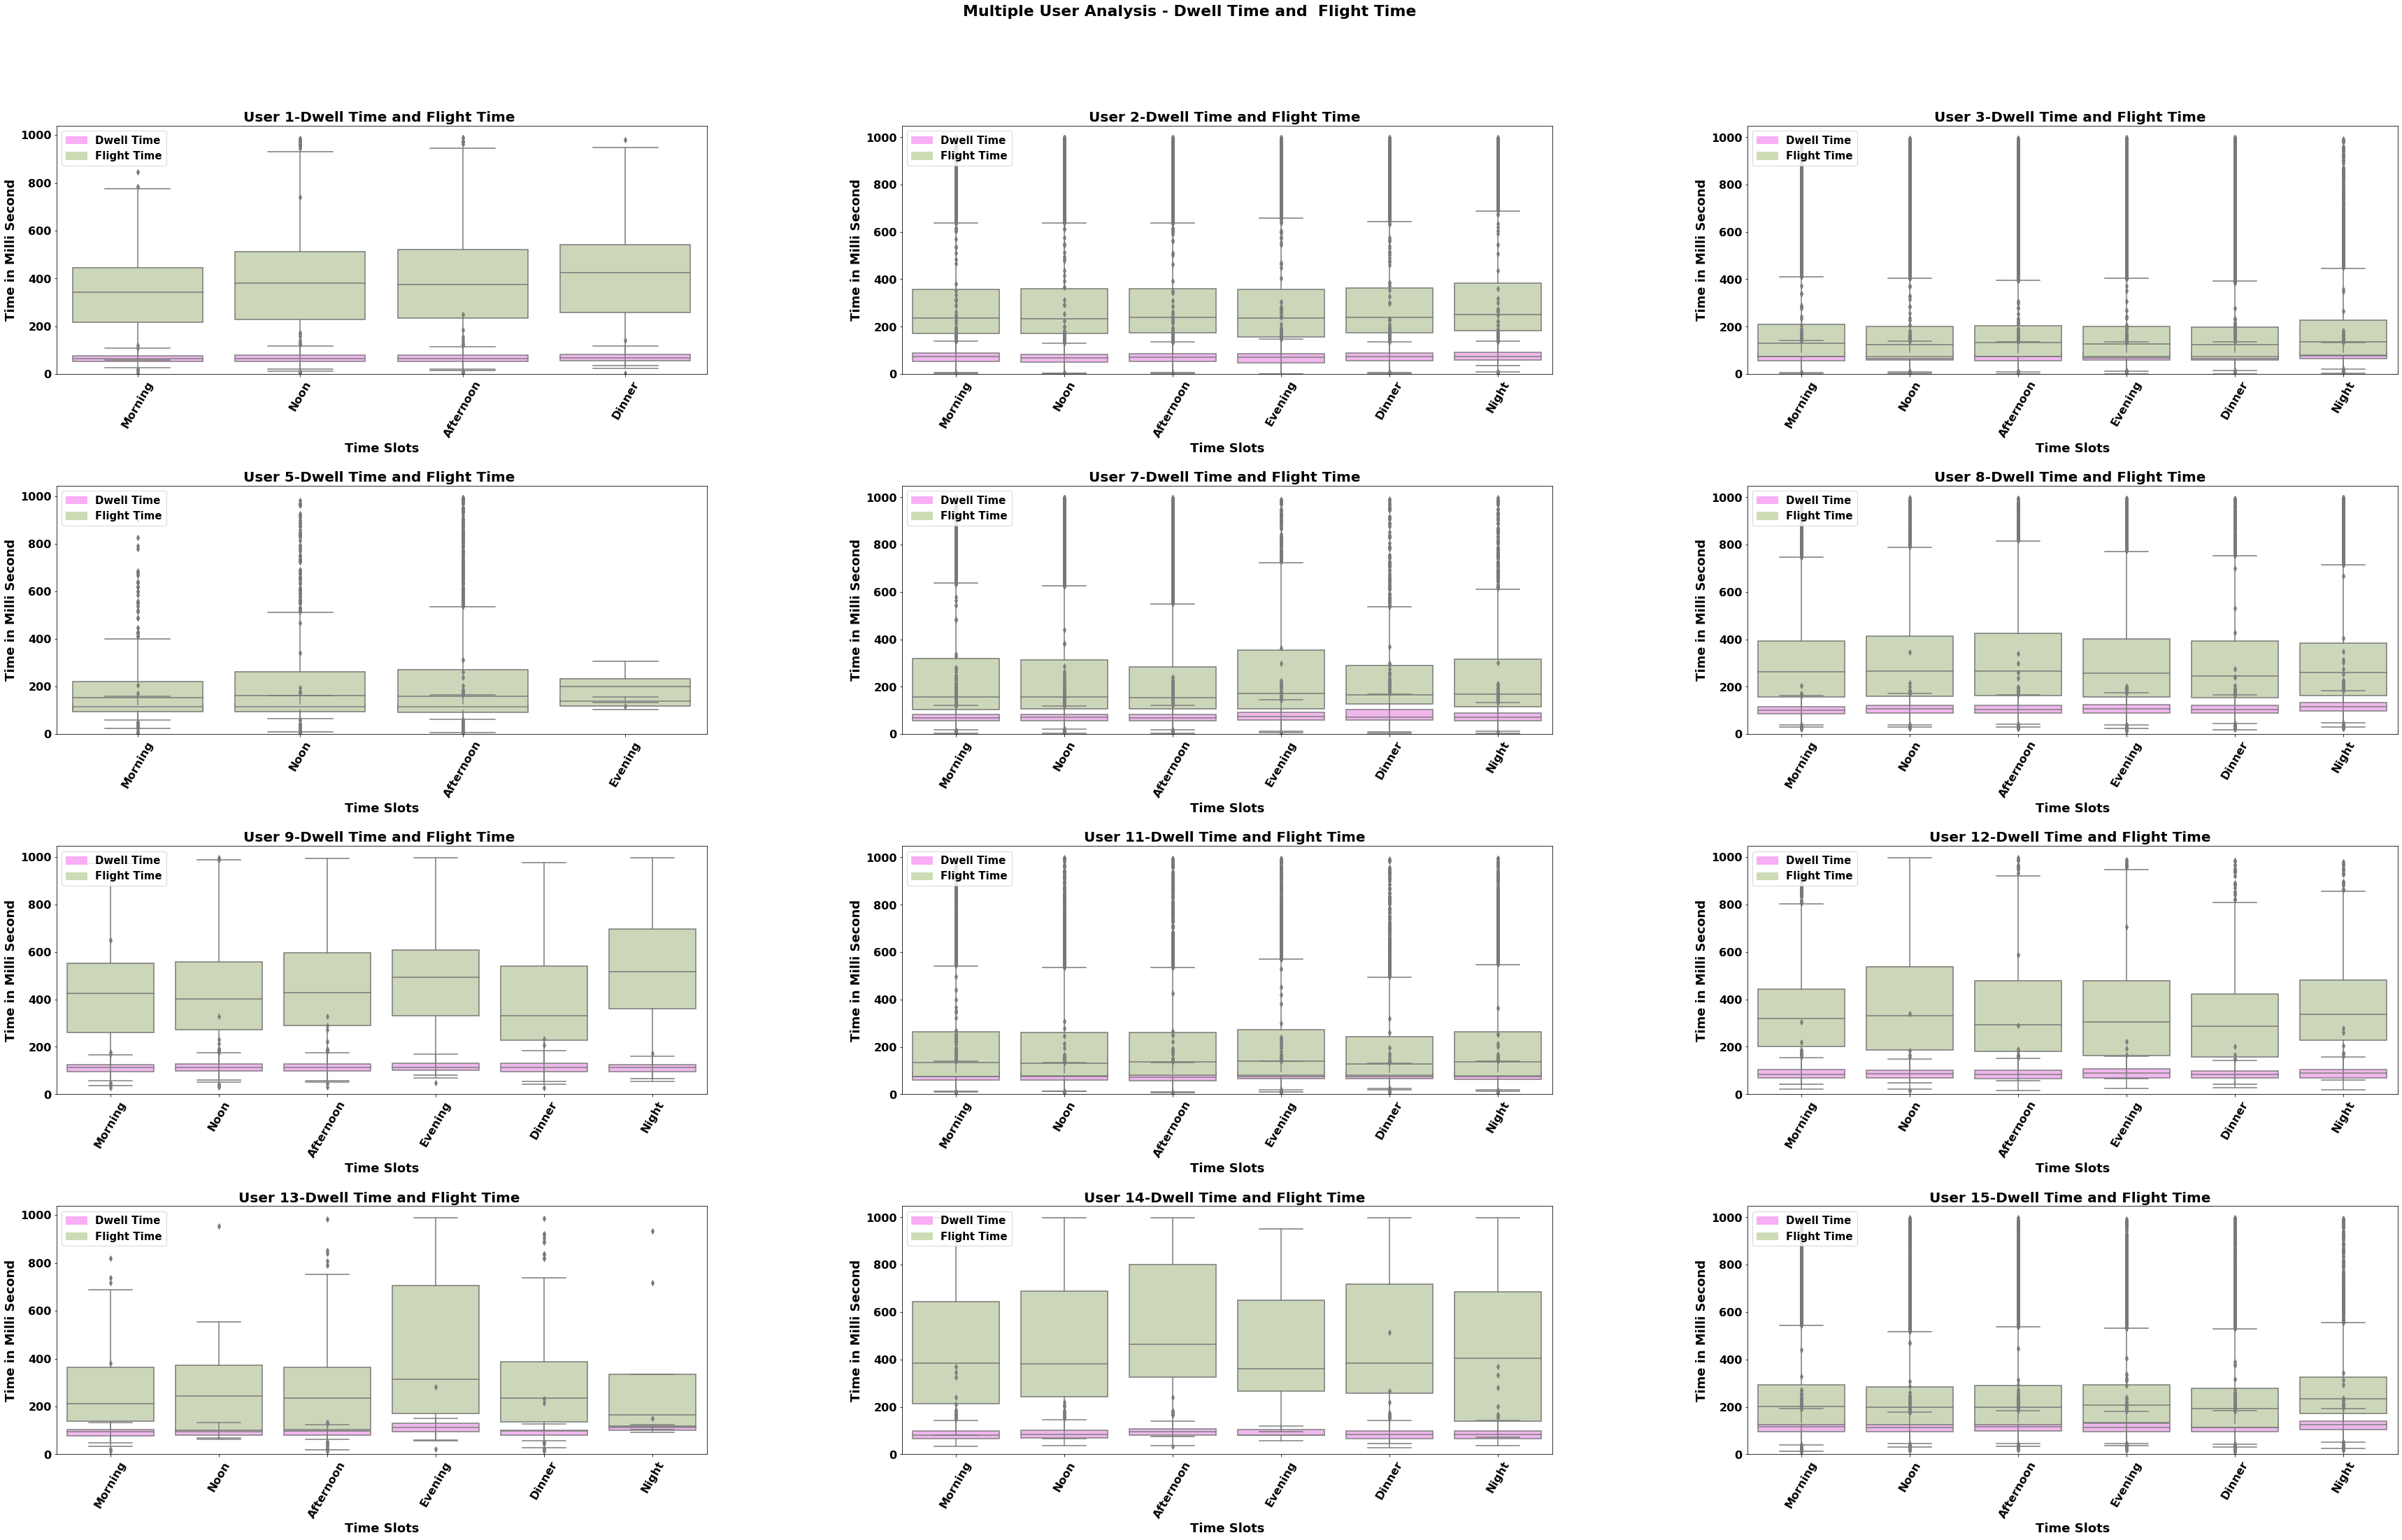

In [ ]:
#Multiple User Analysis in Different Timeslots- Dwell Time Vs Flight Time
fig=plt.figure(figsize=(60,30))
#set a figure title on top 
fig.suptitle('Multiple User Analysis - Dwell Time and  Flight Time', fontsize = 22,fontweight='bold');
#to plot x axis in user name asc order

# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.02, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.45)

#############User1 #########################################################
plt.subplot(4, 3, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 1-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax1 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u1)
ax1 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u1)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 60) 
ax1.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax1.set_xlabel('Time Slots',size=18,fontweight='bold')
ax1.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax1.set_xticklabels(['Morning', 'Noon', 'Afternoon','Dinner'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User2 #########################################################
plt.subplot(4,3,2)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 2-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax2 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u2)
ax2 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u2)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 60) 
ax2.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax2.set_xlabel('Time Slots',size=18,fontweight='bold')
ax2.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User3 #########################################################
plt.subplot(4, 3,3)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 3-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax3 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u3)
ax3 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u3)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 60) 
ax3.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax3.set_xlabel('Time Slots',size=18,fontweight='bold')
ax3.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax3.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User5 #########################################################
plt.subplot(4,3,4)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 5-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax4 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u5)
ax4 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u5)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 60) 
ax4.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax4.set_xlabel('Time Slots',size=18,fontweight='bold')
ax4.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax4.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User7 #########################################################
plt.subplot(4,3,5)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 7-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax5 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u7)
ax5 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u7)
# Puts x-axis labels on an angle
ax5.xaxis.set_tick_params(rotation = 60) 
ax5.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax5.set_xlabel('Time Slots',size=18,fontweight='bold')
ax5.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax5.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 8 #########################################################
plt.subplot(4,3,6)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 8-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax6 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u8)
ax6 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u8)
# Puts x-axis labels on an angle
ax6.xaxis.set_tick_params(rotation = 60) 
ax6.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax6.set_xlabel('Time Slots',size=18,fontweight='bold')
ax6.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax6.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 9 #########################################################
plt.subplot(4,3,7)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 9-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax7 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u9)
ax7 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u9)
# Puts x-axis labels on an angle
ax7.xaxis.set_tick_params(rotation = 60) 
ax7.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax7.set_xlabel('Time Slots',size=18,fontweight='bold')
ax7.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax7.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 11 #########################################################
plt.subplot(4, 3,8)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 11-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax8 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u11)
ax8 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u11)
# Puts x-axis labels on an angle
ax8.xaxis.set_tick_params(rotation = 60) 
ax8.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax8.set_xlabel('Time Slots',size=18,fontweight='bold')
ax8.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax8.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 12 #########################################################
plt.subplot(4,3,9)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 12-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax9 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u12)
ax9 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u12)
# Puts x-axis labels on an angle
ax9.xaxis.set_tick_params(rotation = 60) 
ax9.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax9.set_xlabel('Time Slots',size=18,fontweight='bold')
ax9.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax9.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 13 #########################################################
plt.subplot(4, 3,10)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 13-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax10 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u13)
ax10 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u13)
# Puts x-axis labels on an angle
ax10.xaxis.set_tick_params(rotation = 60) 
ax10.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax10.set_xlabel('Time Slots',size=18,fontweight='bold')
ax10.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax10.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 14 #########################################################
plt.subplot(4, 3,11)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 14-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax11 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u14)
ax11 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u14)
# Puts x-axis labels on an angle
ax11.xaxis.set_tick_params(rotation = 60) 
ax11.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax11.set_xlabel('Time Slots',size=18,fontweight='bold')
ax11.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax11.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############User 15 #########################################################
plt.subplot(4,3,12)#plt.subplot(#rows,#columns,Plot no)
plt.title('User 15-Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax11 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_timeslot_u15)
ax12 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_timeslot_u15)
# Puts x-axis labels on an angle
ax12.xaxis.set_tick_params(rotation = 60) 
ax12.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax12.set_xlabel('Time Slots',size=18,fontweight='bold')
ax12.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax12.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

Mulitple Users By Timezone -Different Time Slot

In [ ]:
df_event.country_code.unique()

array(['IE', 'IN', 'AE', 'SA'], dtype=object)

In [ ]:
#make different df_event for each users
df_event_AE=df_event[df_event.country_code.isin(['AE'])]
df_event_IE=df_event[df_event.country_code.isin(['IE'])]
df_event_IN=df_event[df_event.country_code.isin(['IN'])]
df_event_SA=df_event[df_event.country_code.isin(['SA'])]

In [ ]:
#group by event date and time slot of each country
#AE
df_event_tz_timeslot_AE=df_event_AE[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
  
#IE
df_event_tz_timeslot_IE=df_event_IE[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]

#IN
df_event_tz_timeslot_IN=df_event_IN[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
#SA
df_event_tz_timeslot_SA=df_event_SA[['event_date','time_slot','time_slot_no','dwell_time_ms','flight_time_ms']]
df_event_tz_timeslot_SA

,event_date,time_slot,time_slot_no,dwell_time_ms,flight_time_ms
271416,11-06-2021,Morning,1,112.0,336.0
271417,11-06-2021,Morning,1,77.0,238.0
271418,11-06-2021,Morning,1,129.0,393.0
271419,11-06-2021,Noon,2,61.0,815.0
271420,11-06-2021,Noon,2,107.0,998.0
...,...,...,...,...,...
275015,26-07-2021,Dinner,5,120.0,494.0
275016,26-07-2021,Dinner,5,117.0,372.0
275017,26-07-2021,Dinner,5,126.0,68.0
275018,26-07-2021,Dinner,5,76.0,355.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

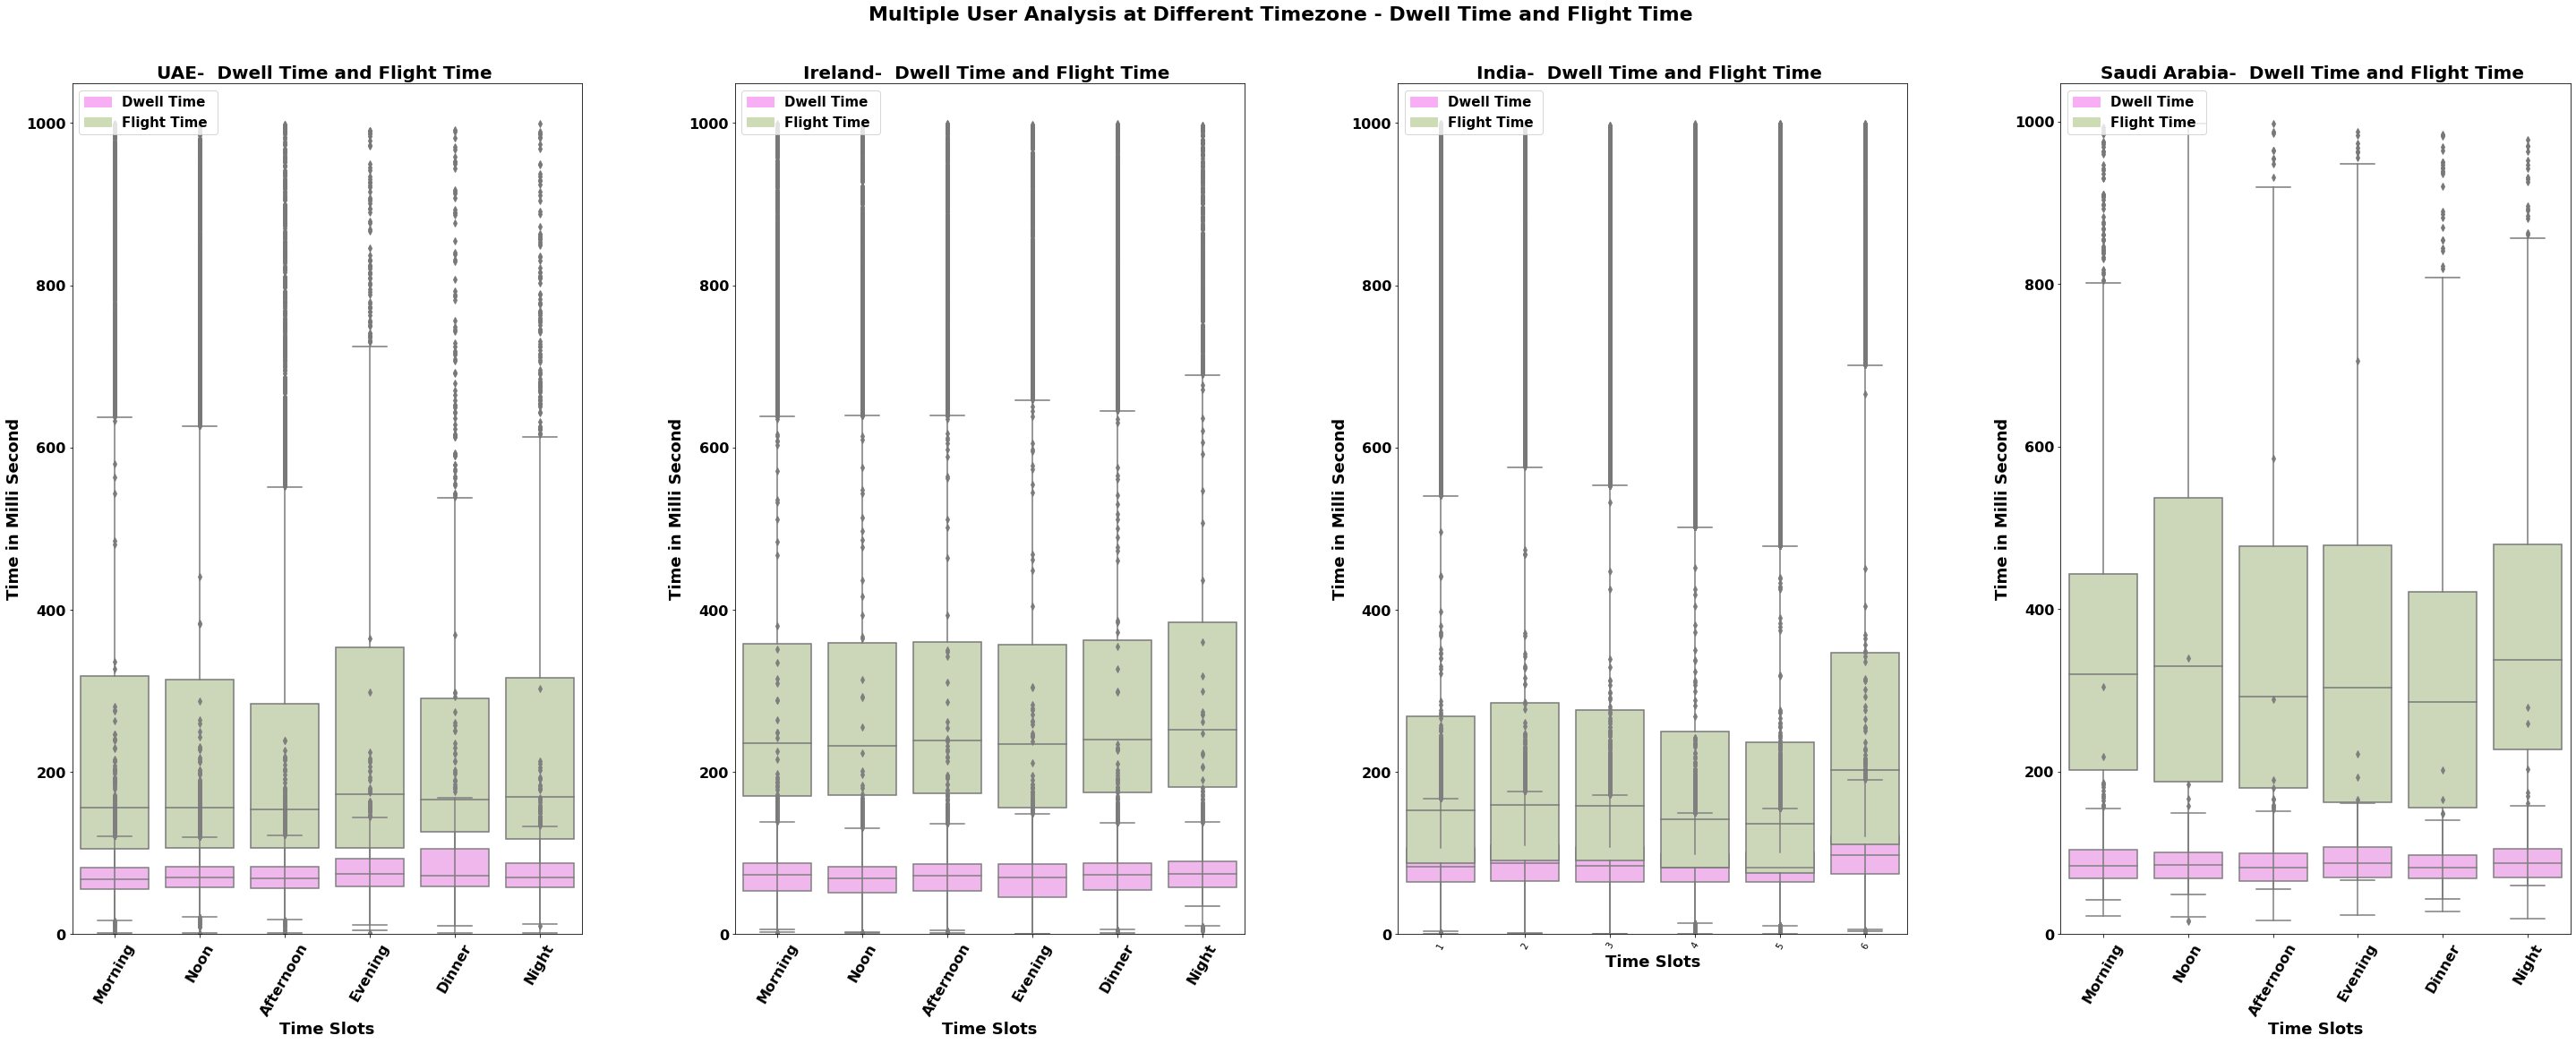

In [ ]:





#Multiple User Analysis at Different  Timezone - Dwell Time Vs Flight Time
fig=plt.figure(figsize=(50,15))
#set a figure title on top 
fig.suptitle('Multiple User Analysis at Different Timezone - Dwell Time and Flight Time', fontsize = 22,fontweight='bold');
# set the spacing between subplots
# set the spacing between subplots
plt.subplots_adjust(left=0.125,
                    bottom=0.02, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.45)
#############At UAE #########################################################
plt.subplot(1, 4, 1)#plt.subplot(#rows,#columns,Plot no)
plt.title('UAE-  Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax1 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_timeslot_AE)
ax1 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_tz_timeslot_AE)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 60) 
ax1.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time ')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax1.set_xlabel('Time Slots',size=18,fontweight='bold')
ax1.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax1.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')
#############At Ireland #########################################################
plt.subplot(1, 4, 2)#plt.subplot(#rows,#columns,Plot no)
plt.title('Ireland-  Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax2 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_timeslot_IE)
ax2 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_tz_timeslot_IE)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 60) 
ax2.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time ')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax2.set_xlabel('Time Slots',size=18,fontweight='bold')
ax2.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############At India #########################################################
plt.subplot(1, 4, 3)#plt.subplot(#rows,#columns,Plot no)
plt.title('India-  Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax3 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_timeslot_IN)
ax3 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_tz_timeslot_IN)
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 60) 
ax3.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time ')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax3.set_xlabel('Time Slots',size=18,fontweight='bold')
ax3.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
#print(plt.xticks())
ax2.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')

#############At Saudi Arabia #########################################################
plt.subplot(1, 4, 4)#plt.subplot(#rows,#columns,Plot no)
plt.title('Saudi Arabia-  Dwell Time and Flight Time ', size = 20,fontweight='bold');
ax4 = sns.boxplot(x="time_slot_no", y="dwell_time_ms",color='#f8aef4', data=df_event_tz_timeslot_SA)
ax4 = sns.boxplot(x="time_slot_no", y="flight_time_ms",color='#cddcb4', data=df_event_tz_timeslot_SA)
# Puts x-axis labels on an angle
ax4.xaxis.set_tick_params(rotation = 60) 
ax4.set_ylim([0, None])
rose_patch = mpatches.Patch(color='#f8aef4', label='Dwell Time')
green_patch = mpatches.Patch(color='#cddcb4', label='Flight Time ')
plt.legend(handles=[rose_patch, green_patch],loc='upper left',prop=dict(weight='bold',size=15))
ax4.set_xlabel('Time Slots',size=18,fontweight='bold')
ax4.set_ylabel('Time in Milli Second',size=18,fontweight='bold')
print(plt.xticks())
ax4.set_xticklabels(['Morning', 'Noon', 'Afternoon','Evening','Dinner','Night'],{'fontsize': 16,'fontweight': 'bold'})
plt.yticks(size=16,fontweight='bold')
